In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.spatial.transform import Rotation as Rot
import json
from simarUtils import *
import torchvision

## Custom Hand Data

In [14]:
data = h5py.File("/coc/flash7/datasets/egoplay/one_bowl_one_object/plushiesMimicplay_with_type_label.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_100', 'demo_101', 'demo_102', 'demo_103', 'demo_104', 'demo_105', 'demo_106', 'demo_107', 'demo_108', 'demo_109', 'demo_11', 'demo_110', 'demo_111', 'demo_112', 'demo_113', 'demo_114', 'demo_115', 'demo_116', 'demo_117', 'demo_118', 'demo_119', 'demo_12', 'demo_120', 'demo_121', 'demo_122', 'demo_123', 'demo_124', 'demo_125', 'demo_126', 'demo_127', 'demo_128', 'demo_129', 'demo_13', 'demo_130', 'demo_131', 'demo_132', 'demo_133', 'demo_134', 'demo_135', 'demo_136', 'demo_137', 'demo_138', 'demo_139', 'demo_14', 'demo_140', 'demo_141', 'demo_142', 'demo_143', 'demo_144', 'demo_145', 'demo_146', 'demo_147', 'demo_148', 'demo_149', 'demo_15', 'demo_150', 'demo_151', 'demo_152', 'demo_153', 'demo_154', 'demo_155', 'demo_156', 'demo_157', 'demo_158', 'demo_159', 'demo_16', 'demo_160', 'demo_161', 'demo_162', 'demo_163', 'demo_164', 'demo_165', 'demo_166', 'demo_167', 

[[-0.14965003 -0.09209008 -0.27357139]]


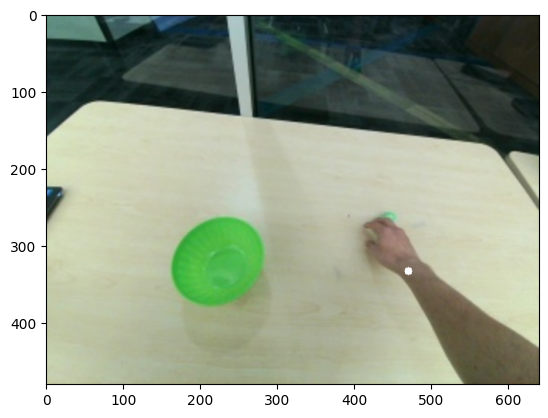

In [19]:
T = 30
hand_pose = data["data/demo_10/obs/ee_pose"][[T]]
print(hand_pose)
px = cam_frame_to_cam_pixels(hand_pose, WIDE_LENS_HAND_LEFT_K)
img = data["data/demo_10/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)

In [20]:
data["data/demo_10/obs/ee_pose"][[T]].round(2)

array([[-0.15, -0.09, -0.27]])

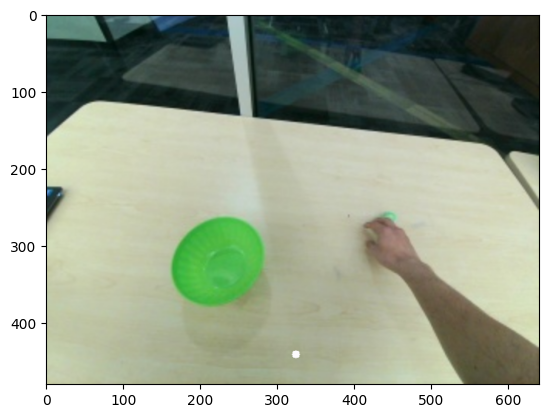

In [32]:
T = 30
ee_pose = np.array([[-0.0, -0.2, -0.27]])
px = cam_frame_to_cam_pixels(ee_pose, WIDE_LENS_HAND_LEFT_K)
img = data["data/demo_10/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)

In [ ]:
+x = left
+y = up
+z = backward

## Aria Hand Data

In [3]:
# data = h5py.File("/coc/flash7/datasets/egoplay/_OBOO_ARIA/oboo_aria_apr11/rawAria/oboo_aria_apr11/converted/oboo_aria_apr11_Mimicplay_LH3_3dim.hdf5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/_OBOO_ARIA/oboo_yellow_jun12/converted/oboo_yellow_jun12_ACTGMMCompat_masked.hdf5", "r")
data = h5py.File("/coc/flash9/datasets/Egoplay/CLOTHFOLD_ARIA/converted/clothfold_aria.hdf5", "r")
nds(data)

BlockingIOError: [Errno 11] Unable to open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

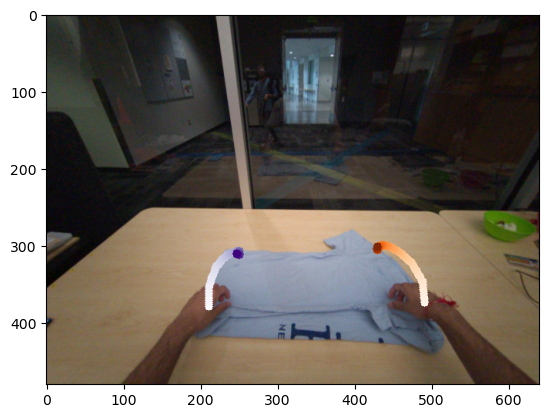

In [4]:
T = 150
demo = "demo_0"
hand_pose_l = data[f"data/{demo}/actions_xyz_act"][T, :, :3]
hand_pose_r = data[f"data/{demo}/actions_xyz_act"][T, :, 3:]
# hand_pose_l = data[f"data/{demo}/obs/ee_pose"][[T], :3]
# hand_pose_r = data[f"data/{demo}/obs/ee_pose"][[T], 3:]

px = cam_frame_to_cam_pixels(hand_pose_l, WIDE_LENS_HAND_LEFT_K)
px2 = cam_frame_to_cam_pixels(hand_pose_r, WIDE_LENS_HAND_LEFT_K)
img = data[f"data/{demo}/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False, palette="Purples")
img = draw_dot_on_frame(img, px2, show=False, palette="Oranges")
# print(px.round(0).astype(int), px2.round(0).astype(int))
plt.imshow(img)

In [7]:
demo = "demo_11"
all_imgs = []
for t in range(0, 255):
    hand_pose_l = data[f"data/{demo}/actions_xyz_act"][t, :, :3]
    hand_pose_r = data[f"data/{demo}/actions_xyz_act"][t, :, 3:]
    px = cam_frame_to_cam_pixels(hand_pose_l, WIDE_LENS_HAND_LEFT_K)
    px2 = cam_frame_to_cam_pixels(hand_pose_r, WIDE_LENS_HAND_LEFT_K)
    img = data[f"data/{demo}/obs/front_img_1"][t]
    img = draw_dot_on_frame(img, px, show=False, palette="Purples")
    img = draw_dot_on_frame(img, px2, show=False, palette="Oranges")
    all_imgs.append(img)

all_imgs = torch.from_numpy(np.array(all_imgs))
# make video via torchvision
torchvision.io.write_video(f"hand_pose_filterv4_{demo}.mp4", all_imgs, fps=30)


## Robot Data

In [6]:
data = h5py.File("/coc/flash9/datasets/Egoplay/CLOTHFOLD_ROBOTWA/converted/clothfold_robotwa.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_11', 'demo_12', 'demo_13', 'demo_14', 'demo_15', 'demo_16', 'demo_17', 'demo_18', 'demo_19', 'demo_2', 'demo_20', 'demo_21', 'demo_22', 'demo_23', 'demo_24', 'demo_25', 'demo_26', 'demo_27', 'demo_28', 'demo_29', 'demo_3', 'demo_30', 'demo_31', 'demo_32', 'demo_33', 'demo_34', 'demo_35', 'demo_36', 'demo_37', 'demo_38', 'demo_39', 'demo_4', 'demo_40', 'demo_41', 'demo_42', 'demo_43', 'demo_44', 'demo_45', 'demo_46', 'demo_47', 'demo_48', 'demo_49', 'demo_5', 'demo_50', 'demo_51', 'demo_52', 'demo_53', 'demo_54', 'demo_55', 'demo_56', 'demo_57', 'demo_58', 'demo_6', 'demo_7', 'demo_8', 'demo_9']>
	demo_0: dict with keys:  <KeysViewHDF5 ['actions_joints', 'actions_joints_act', 'actions_xyz', 'actions_xyz_act', 'obs']>
		actions_joints: (5000, 10, 14)
		actions_joints_act: (5000, 100, 14)
		actions_xyz: (5000, 10, 6)
		actions_xyz_act: (5000, 100, 6)
		obs: dict with

In [12]:
# def add_extra_train_splits(data, split_percentages):
#     """
#     data: hdf5 file in robomimic format
#     split_percentages: list of percentages for each split, e.g. [0.7, 0.1, 0.2]
#     add key "mask/train_{split_name}" which subsamples "mask/train" by split_percentages
#     """
#     N = len(data["mask/train"][:])
#     random_order = np.random.permutation(N)
#     mask = data["mask/train"][:]
#     splits = []
#     for split in split_percentages:
#         # data[f"mask/train_{split_percentages:.2f}"] = random_order[:int(N*split)]
#         sorted_order = np.sort(random_order[:int(N*split)])
#         print(sorted_order)
#         splits.append(sorted_order)
#         print(mask[sorted_order])
#         data[f"mask/train_{int(split*100)}%"] = mask[sorted_order]
    
#     for i in range(4):
#         print(i)
#         assert set(splits[i]).issubset(set(splits[i+1]))

# add_extra_train_splits(data, [0.1, 0.3, 0.5, 0.7, 0.9])

[16 18 19 45 51]
[b'demo_26' b'demo_28' b'demo_29' b'demo_59' b'demo_65']
[ 0  9 10 11 14 16 18 19 23 28 44 45 48 51 52]
[b'demo_0' b'demo_18' b'demo_19' b'demo_2' b'demo_23' b'demo_26'
 b'demo_28' b'demo_29' b'demo_32' b'demo_39' b'demo_58' b'demo_59'
 b'demo_61' b'demo_65' b'demo_8']
[ 0  2  4  5  8  9 10 11 12 14 15 16 18 19 23 28 31 32 44 45 46 47 48 50
 51 52]
[b'demo_0' b'demo_10' b'demo_12' b'demo_13' b'demo_17' b'demo_18'
 b'demo_19' b'demo_2' b'demo_21' b'demo_23' b'demo_25' b'demo_26'
 b'demo_28' b'demo_29' b'demo_32' b'demo_39' b'demo_43' b'demo_44'
 b'demo_58' b'demo_59' b'demo_6' b'demo_60' b'demo_61' b'demo_64'
 b'demo_65' b'demo_8']
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 19 23 24 28 30 31 32
 33 34 37 40 44 45 46 47 48 49 50 51 52]
[b'demo_0' b'demo_1' b'demo_10' b'demo_11' b'demo_12' b'demo_13'
 b'demo_17' b'demo_18' b'demo_19' b'demo_2' b'demo_21' b'demo_22'
 b'demo_23' b'demo_25' b'demo_26' b'demo_27' b'demo_28' b'demo_29'
 b'demo_32' b'demo_33' b'demo_39

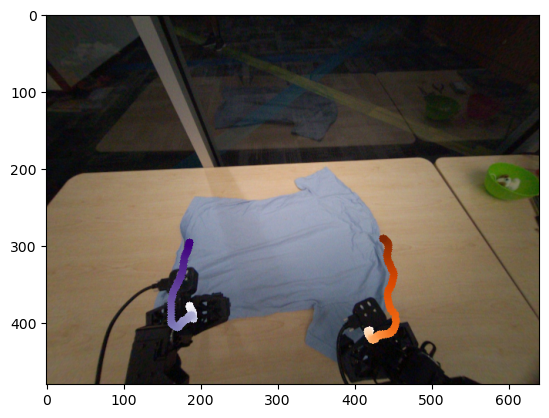

In [9]:
T = 150
demo = "demo_0"
hand_pose_l = data[f"data/{demo}/actions_xyz_act"][T, :, :3]
hand_pose_r = data[f"data/{demo}/actions_xyz_act"][T, :, 3:]
# hand_pose_l = data[f"data/{demo}/obs/ee_pose"][[T], :3]
# hand_pose_r = data[f"data/{demo}/obs/ee_pose"][[T], 3:]

px = cam_frame_to_cam_pixels(hand_pose_l, WIDE_LENS_HAND_LEFT_K)
px2 = cam_frame_to_cam_pixels(hand_pose_r, WIDE_LENS_HAND_LEFT_K)
img = data[f"data/{demo}/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False, palette="Purples")
img = draw_dot_on_frame(img, px2, show=False, palette="Oranges")
# print(px.round(0).astype(int), px2.round(0).astype(int))
plt.imshow(img)

In [13]:
demo = "demo_4"
all_imgs = []
for t in range(0, 2000):
    hand_pose_l = data[f"data/{demo}/actions_xyz_act"][t, :, :3]
    hand_pose_r = data[f"data/{demo}/actions_xyz_act"][t, :, 3:]
    px = cam_frame_to_cam_pixels(hand_pose_l, WIDE_LENS_HAND_LEFT_K)
    px2 = cam_frame_to_cam_pixels(hand_pose_r, WIDE_LENS_HAND_LEFT_K)
    img = data[f"data/{demo}/obs/front_img_1"][t]
    img = draw_dot_on_frame(img, px, show=False, palette="Purples")
    img = draw_dot_on_frame(img, px2, show=False, palette="Oranges")
    all_imgs.append(img)

all_imgs = torch.from_numpy(np.array(all_imgs))
# make video via torchvision
torchvision.io.write_video(f"robot_data_{demo}.mp4", all_imgs, fps=30)

In [ ]:
+x right
+y down
+z forward

## Aloha Data

In [4]:
data = h5py.File("/coc/flash7/datasets/egoplay/hand_data_robo_cam_may_20/episode_0.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['action', 'observations']>
action: (5000, 14)
observations: dict with keys:  <KeysViewHDF5 ['effort', 'images', 'qpos', 'qvel']>
	effort: (5000, 14)
	images: dict with keys:  <KeysViewHDF5 ['cam_high', 'cam_right_wrist']>
		cam_high: (5000, 480, 640, 3)
		cam_right_wrist: (5000, 480, 640, 3)
	qpos: (5000, 14)
	qvel: (5000, 14)


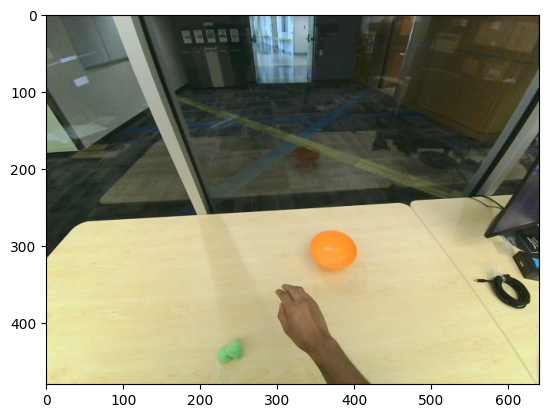

In [6]:
plt.imshow(data["observations/images/cam_high"][1000])